# Image Processing Mini Tasks (OpenCV)


## 1. Load and Display a Sample Image
We will use a sample CIFAR-10 image for demonstration.

C:\Users\Admin\AppData\Local\Temp\ipykernel_372\3451197801.py:11: VisibleDeprecationWarning: dtype(): align should be passed as Python or NumPy boolean but got `align=0`. Did you mean to pass a tuple to create a subarray type? (Deprecated NumPy 2.4)
  batch = pickle.load(f, encoding='bytes')


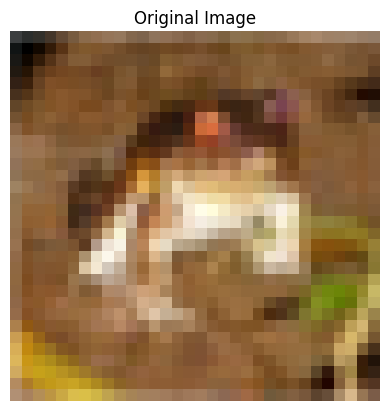

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Load a sample CIFAR-10 image (replace with your own image if needed)
try:
    # Try to load from the main notebook's workspace if available
    import pickle, os
    def load_cifar10_batch(batch_filename):
        with open(batch_filename, 'rb') as f:
            batch = pickle.load(f, encoding='bytes')
            data = batch[b'data']
            labels = batch[b'labels']
            return data, labels
    data_dir = 'cifar-10-batches-py'
    data, labels = load_cifar10_batch(os.path.join(data_dir, 'data_batch_1'))
    img = data[0].reshape(3, 32, 32).transpose(1, 2, 0).astype(np.uint8)
    # Upscale image for better visualization
    img = cv2.resize(img, (128, 128), interpolation=cv2.INTER_NEAREST)
except Exception as e:
    # If not available, create a random image
    print('CIFAR-10 image not found, using random image:', e)
    img = np.random.randint(0, 255, (128, 128, 3), dtype=np.uint8)

plt.imshow(img)
plt.title('Original Image (Upscaled)')
plt.axis('off')
plt.show()

## 2. Edge Detection (Canny)

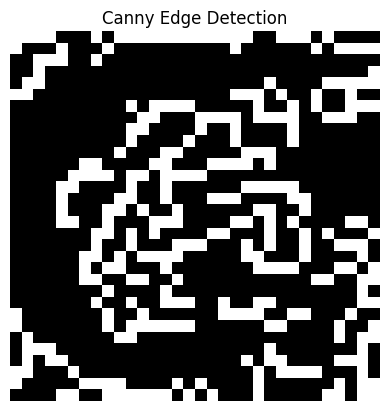

In [2]:
# Convert to grayscale for edge detection
gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
edges = cv2.Canny(gray, 100, 200)

plt.imshow(edges, cmap='gray')
plt.title('Canny Edge Detection')
plt.axis('off')
plt.show()

## 3. Image Thresholding

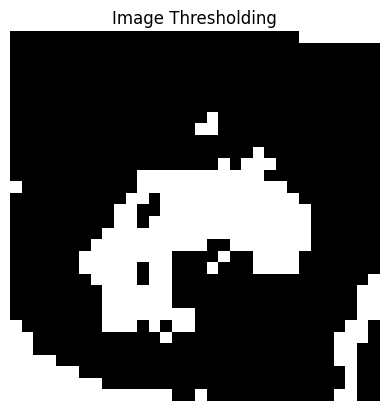

In [3]:
# Simple thresholding
ret, thresh = cv2.threshold(gray, 128, 255, cv2.THRESH_BINARY)

plt.imshow(thresh, cmap='gray')
plt.title('Image Thresholding')
plt.axis('off')
plt.show()

## 4. Image Augmentation (Flip, Rotate, Brightness Adjustment)

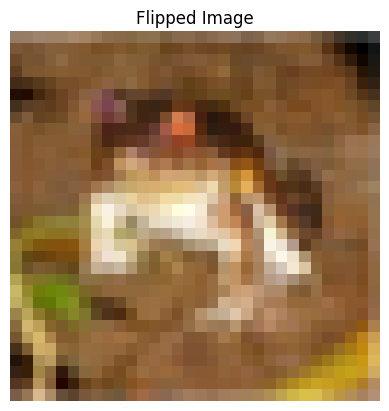

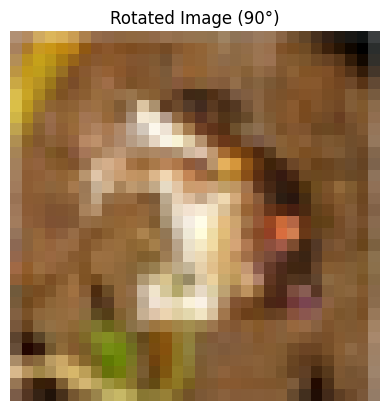

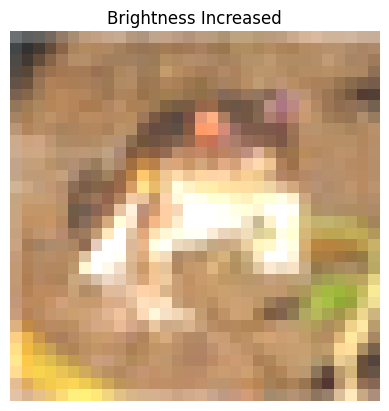

In [4]:
# Horizontal flip
img_flip = cv2.flip(img, 1)
plt.imshow(img_flip)
plt.title('Flipped Image')
plt.axis('off')
plt.show()

# Rotation (90 degrees)
img_rot = cv2.rotate(img, cv2.ROTATE_90_CLOCKWISE)
plt.imshow(img_rot)
plt.title('Rotated Image (90°)')
plt.axis('off')
plt.show()

# Brightness adjustment (increase)
img_bright = cv2.convertScaleAbs(img, alpha=1.0, beta=50)
plt.imshow(img_bright)
plt.title('Brightness Increased')
plt.axis('off')
plt.show()